# BreastGuard: Machine Learning-Based Breast Cancer Prediction System 

>BreastGuard is an advanced machine learning system designed to predict the likelihood of breast cancer by analyzing clinical data and laboratory Data. 

>**Utilizing data-driven techniques**, the project integrates various classification algorithms to identify patterns and provide accurate, early detection of breast cancer. 

>This innovative approach aims to **assist healthcare professionals** in making informed quick decisions, improving diagnostic accuracy, and potentially saving lives through early intervention.

# PROJECT OBJECTIVE

### The key challenge against its detection is how to classify tumors into:
- Malignant (cancerous)  
- Benign(non-cancerous)





# IMPORTING NECESSARY LIBRARIES

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
# Scikit-learn for Machine Learning
import sklearn
from sklearn import model_selection
from sklearn.model_selection import (train_test_split, 
    KFold, 
    cross_val_score, 
    StratifiedKFold, 
    learning_curve, 
    GridSearchCV
)

from sklearn.metrics import (
    confusion_matrix, 
    make_scorer, 
    accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Keras for Deep Learning
from keras.models import Sequential, model_from_json
from keras.optimizers import (
    SGD, 
    RMSprop, 
    Adam, 
    Adagrad, 
    Adadelta
)

from keras.layers import (
    Dense, 
    Dropout, 
    Activation
)

from sklearn.preprocessing import StandardScaler

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

#  DATA DESCRIPTION

### DATASET OVERVIEW

##### COLUMNS DEFINITION
- **ID**:	Unique identifier for each record or patient.
- **Age**: The age of the patient, typically in years.
- **Gender**: The patient's gender (e.g., Male, Female)	
- **Nature_of_Aspirate**: Describes the characteristics of the aspirated sample (e.g., hemorrhagic, creamy, serous)	
- **laterallity**: Indicates which of the breasts (left or right) the aspirate was Taken from.
- **Lymph_Node**:	Status or description of lymph node involvement (e.g., Present, Absent).
- **Diagnosis**: The final medical diagnosis based on the data (e.g., benign, malignant).

### EXPLORATORY DATA ANALYSIS (EDA)

In [173]:
#Import the Dataset
data = pd.read_csv("breast cancer dataset.csv")
data.head()

,ID,Age,Gender,Nature_of_Aspirate,laterallity,Lymph_Node,Diagnosis
0,UC-22-001,30,F,hemorrhagic,L,No,1
1,UC-22-003,40,F,hemorrhagic,R,No,0
2,UC-22-004,20,F,Clear,L,No,0
3,UC-22-005,22,F,hemorrhagic,R,No,0
4,UC-22-006,64,F,sanguineous,L,Yes,1


In [67]:
# Display General Information about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  349 non-null    object
 1   Age                 349 non-null    int64 
 2   Gender              349 non-null    object
 3   Nature_of_Aspirate  349 non-null    object
 4   laterallity         349 non-null    object
 5   Lymph_Node          349 non-null    object
 6   Diagnosis           349 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 19.2+ KB
None


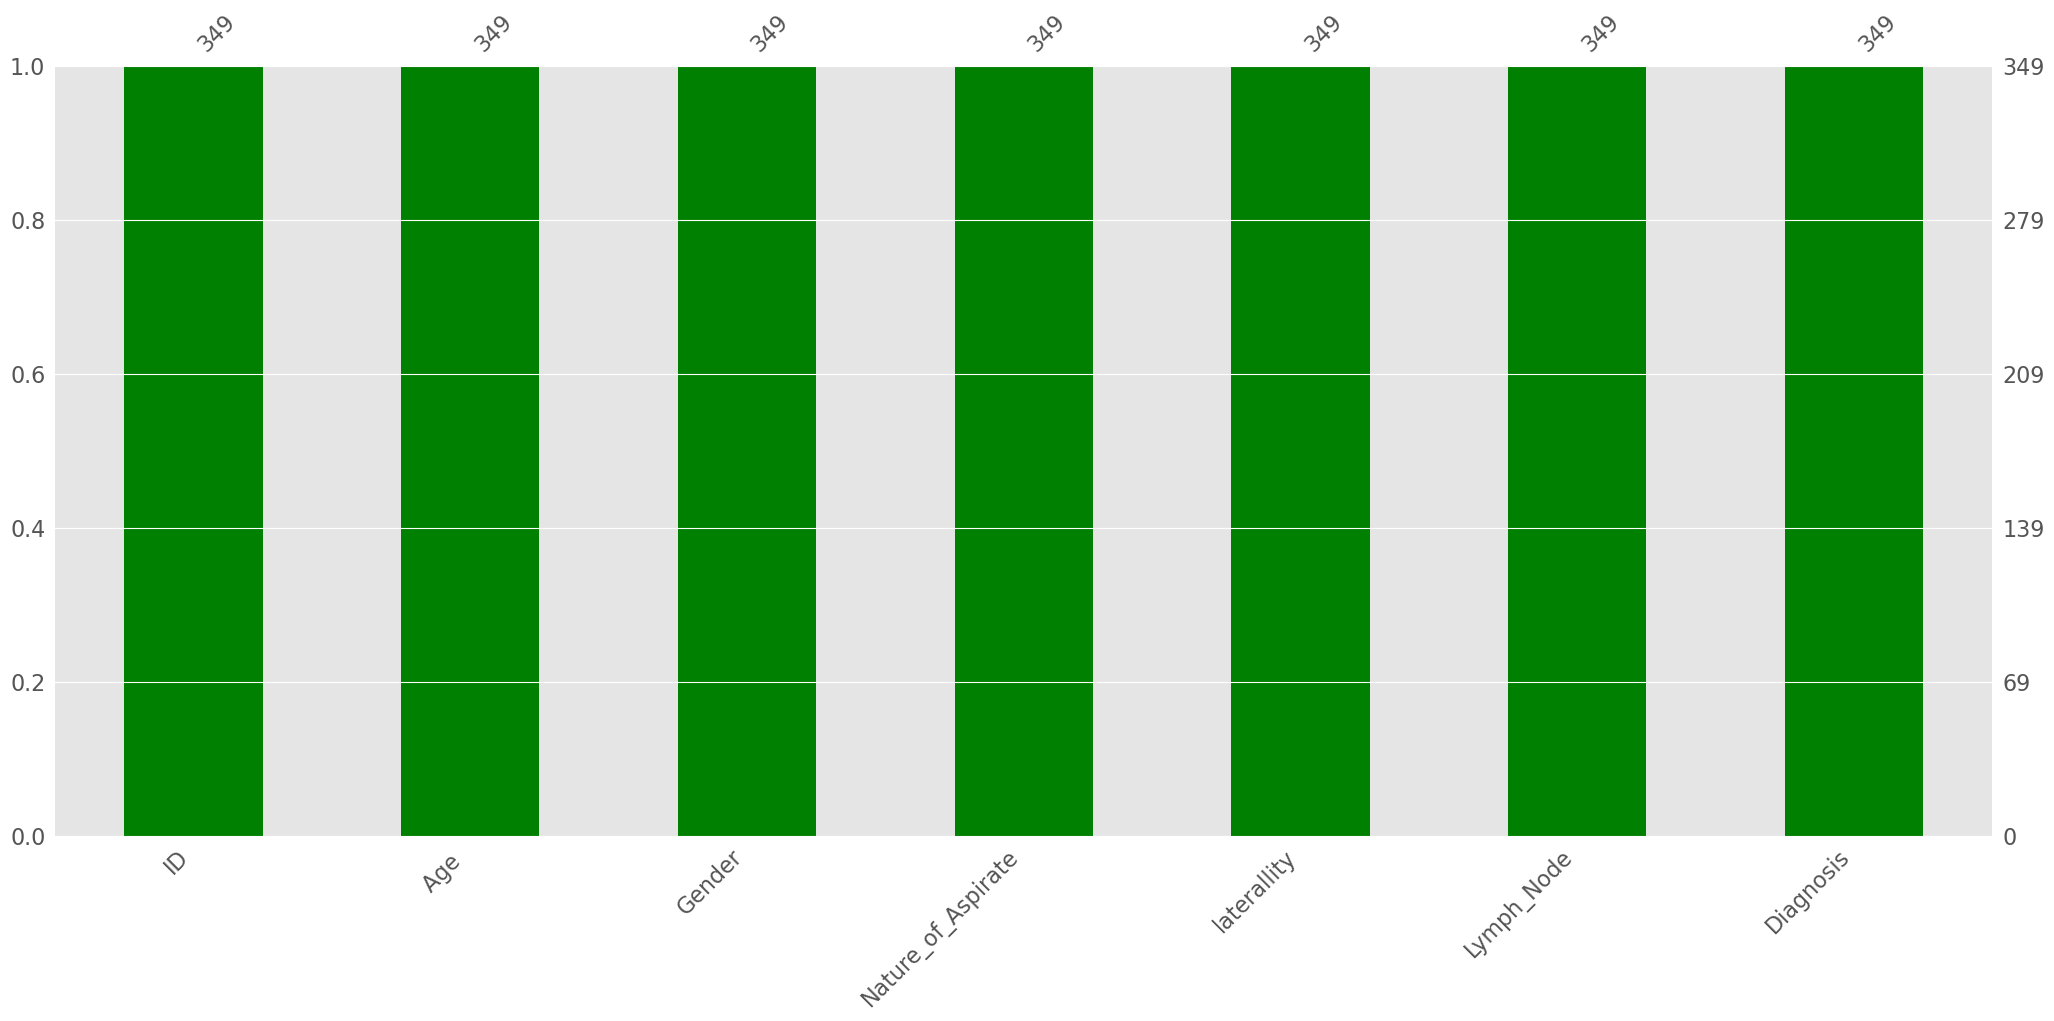

In [68]:
# Display the gradient values
msno.bar(data, color="green") 

plt.show()

In [11]:
# Statistical description of numeric columns 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,349.0,38.879656,15.020957,2.0,26.0,38.0,48.0,82.0
Diagnosis,349.0,0.346705,0.476604,0.0,0.0,0.0,1.0,1.0


In [69]:
# Statistical description of Categorical columns 
data.describe(include = "object").T

,count,unique,top,freq
ID,349,346,UC-22-035,2
Gender,349,2,F,325
Nature_of_Aspirate,349,16,hemorrhagic,147
laterallity,349,2,L,181
Lymph_Node,349,2,No,253


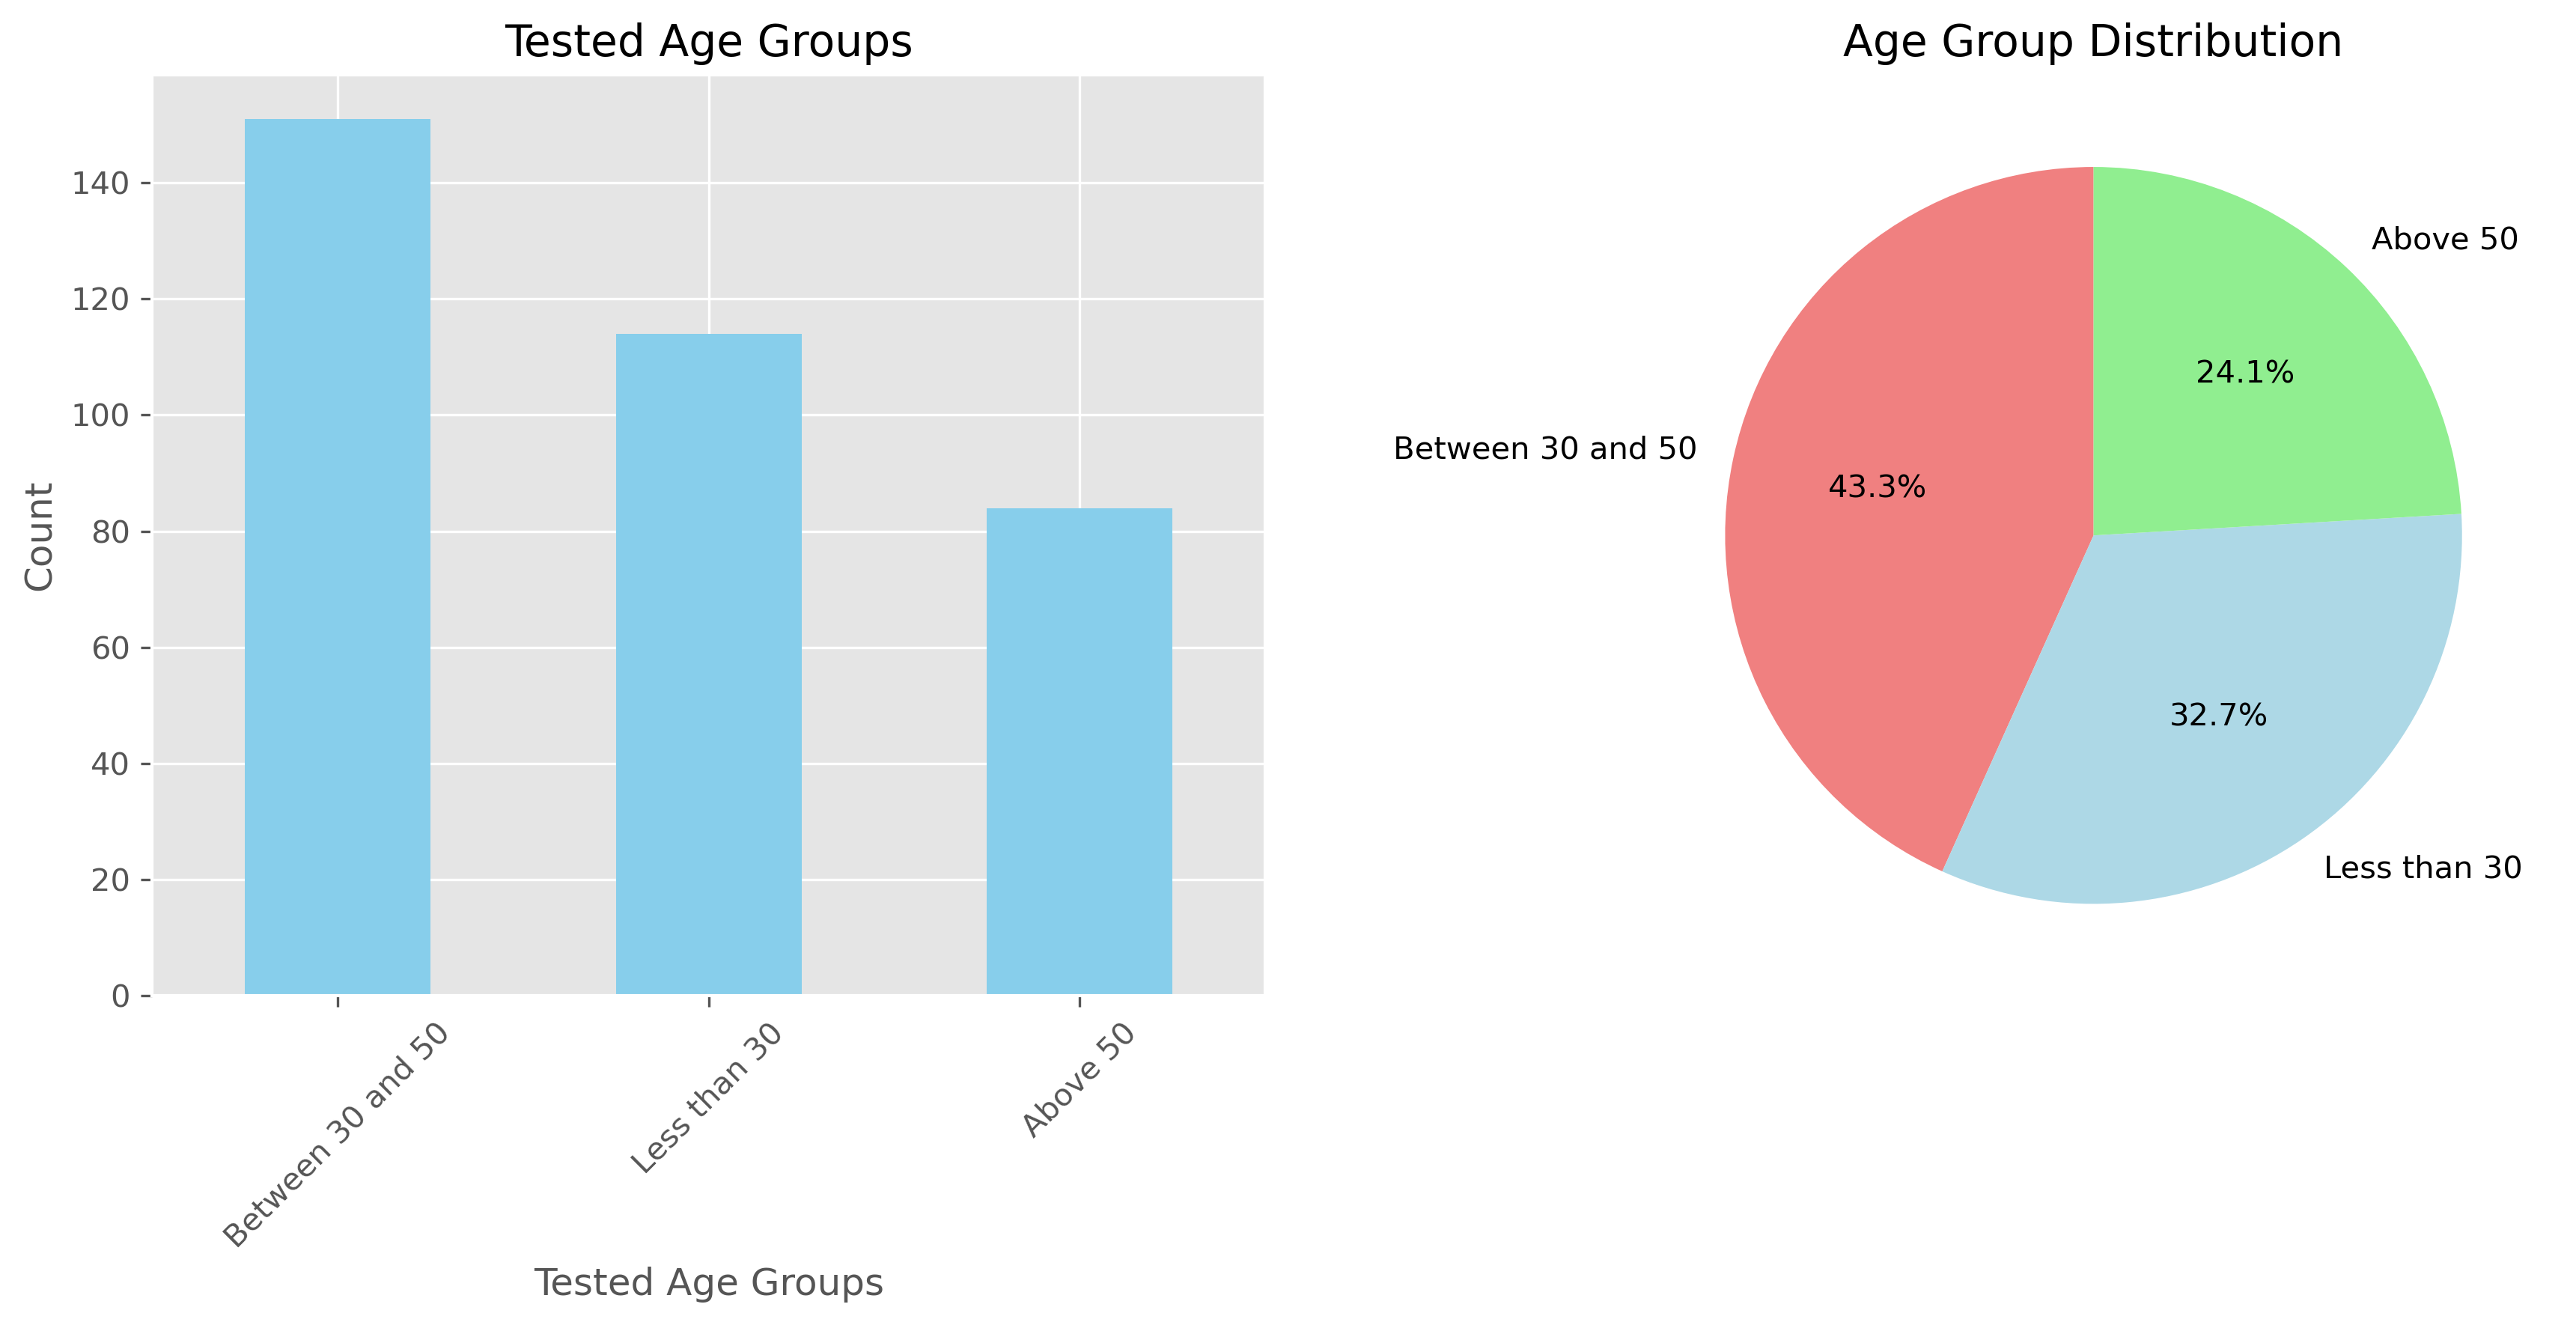

<Figure size 640x480 with 0 Axes>

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels for age groups
bins = [0, 30, 50, 100]  # Define bins for the age groups
labels = ['Less than 30', 'Between 30 and 50', 'Above 50']  # Labels for the groups

# Create age group counts directly using the correct column name
age_group_counts = pd.cut(data['Age '], bins=bins, labels=labels, right=False).value_counts()

# Bar Chart
plt.figure(figsize=(12, 6), dpi=300)  # Increase figure size and DPI

# Create bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Tested Age Groups', fontsize=14)
plt.xlabel('Tested Age Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Age Group Distribution', fontsize=14)
plt.ylabel('')  # Remove y-label for pie chart

# Show the plots
plt.tight_layout()
plt.show()

# Save the figure with higher quality if needed
plt.savefig('age_group_distribution.png', dpi=800, bbox_inches='tight')  # Save as PNG with high DPI


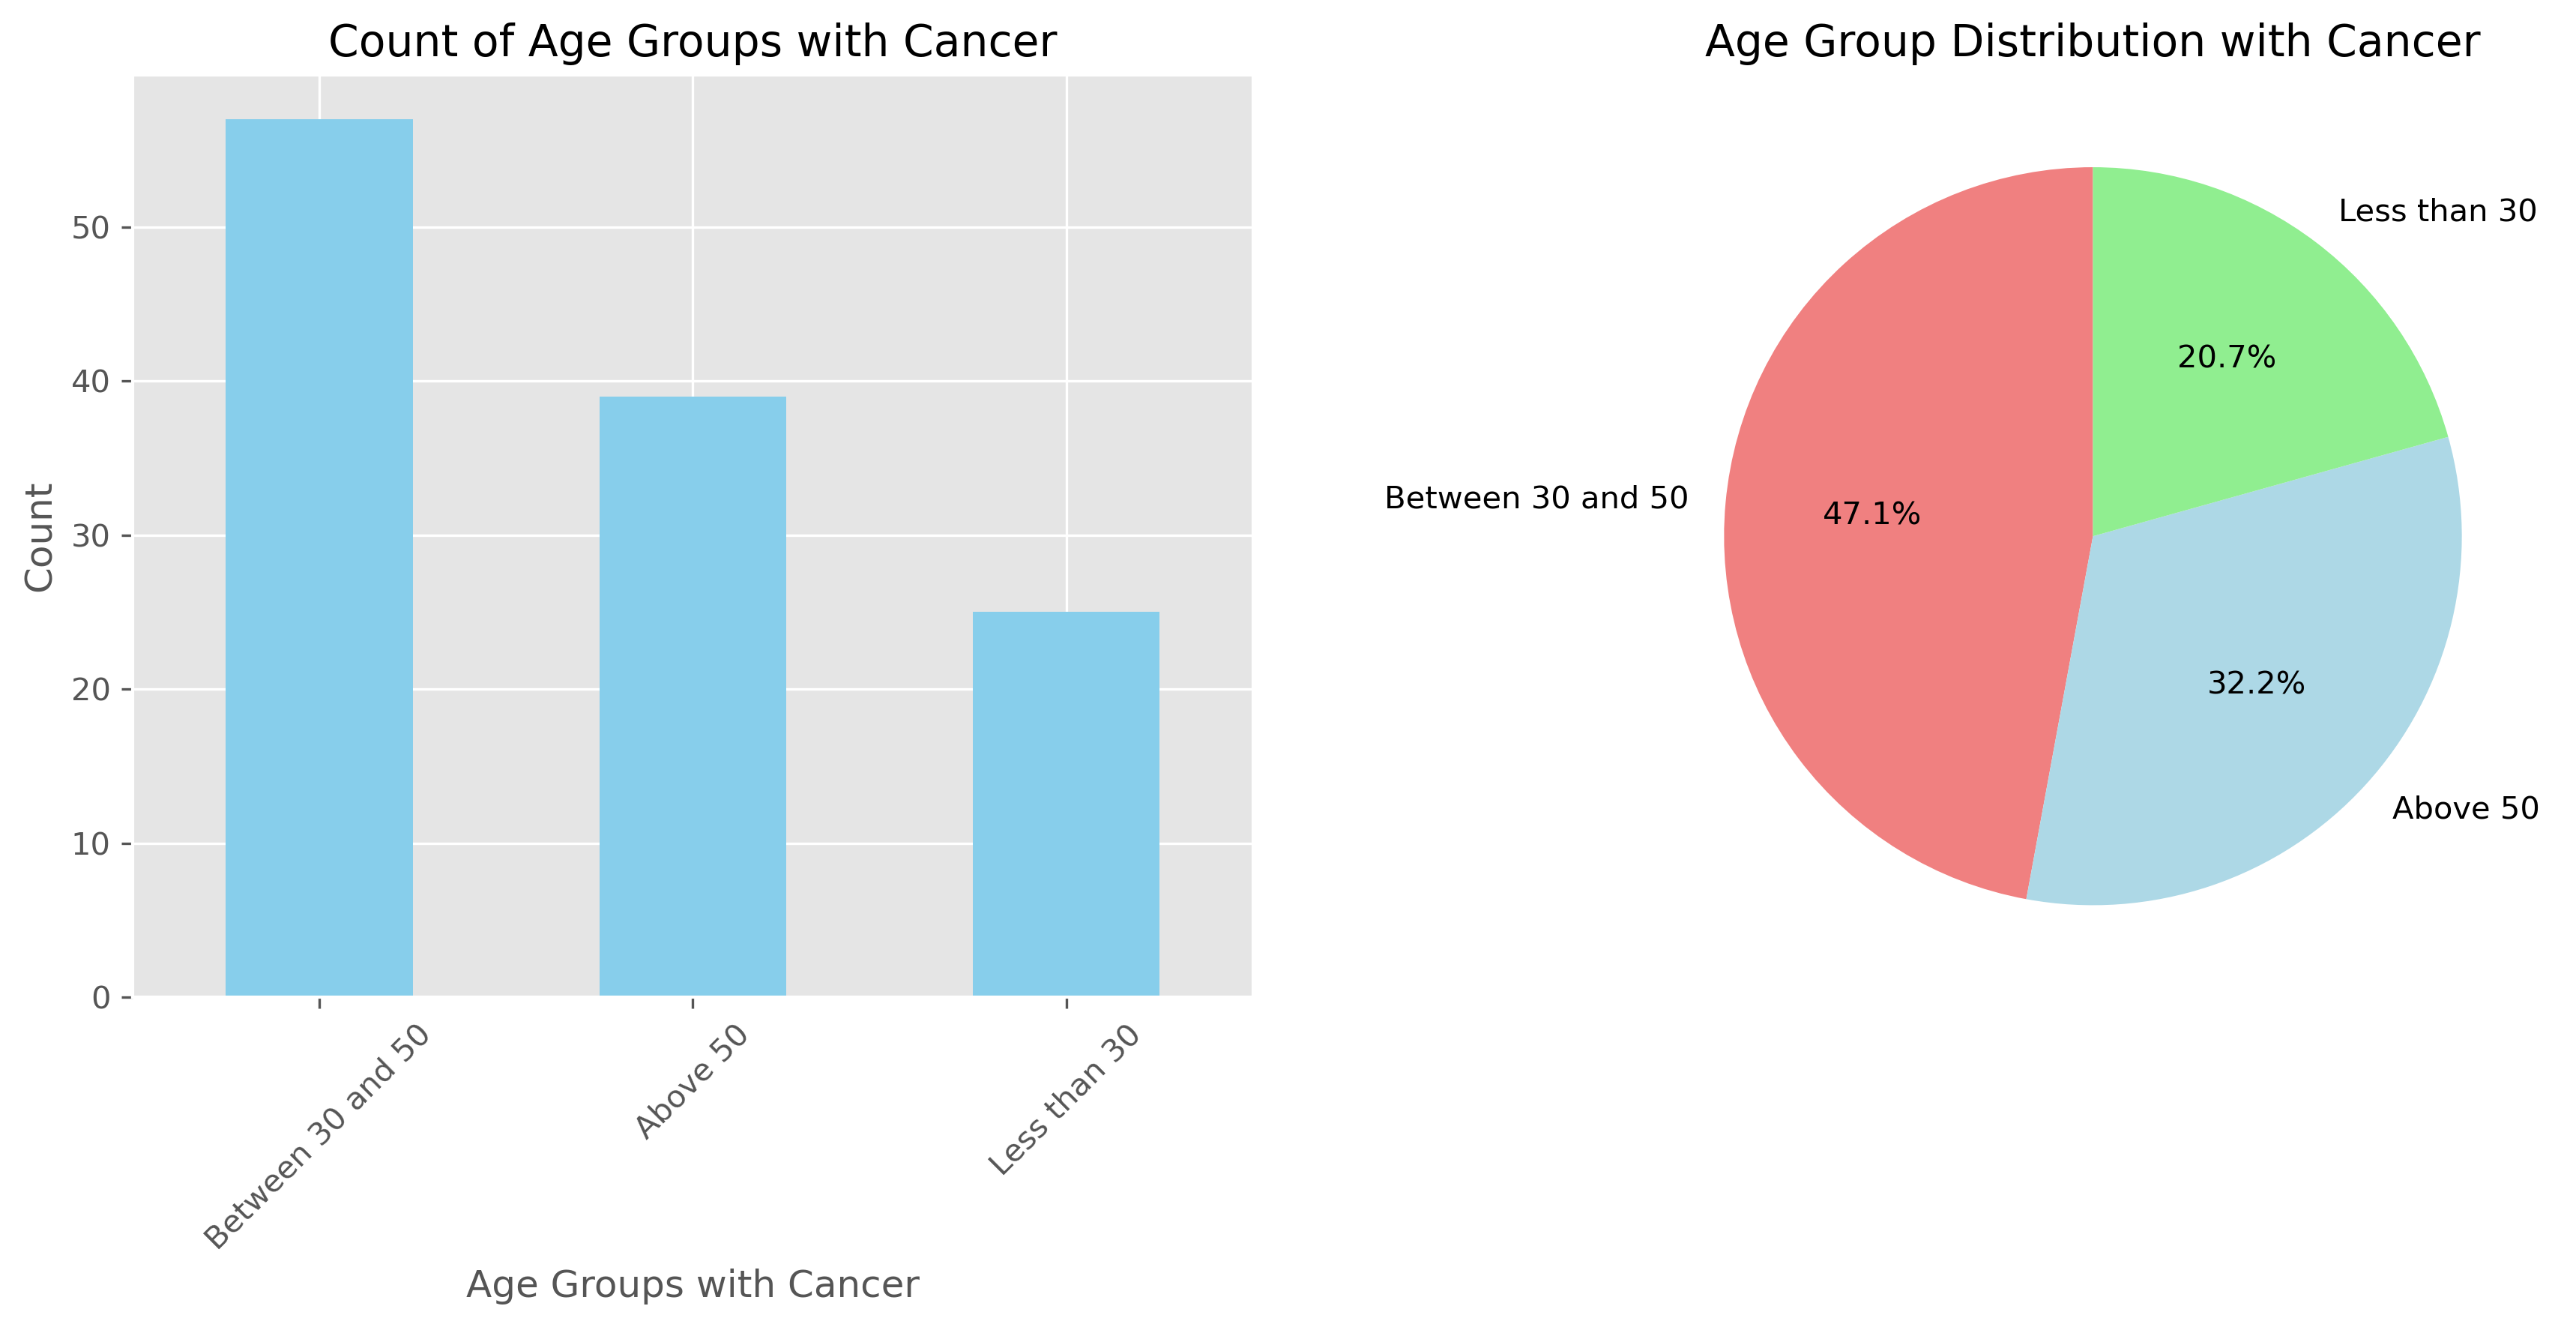

<Figure size 640x480 with 0 Axes>

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels for age groups
bins = [0, 30, 50, 100]  # Define bins for the age groups
labels = ['Less than 30', 'Between 30 and 50', 'Above 50']  # Labels for the groups

# Filter the data for those diagnosed with cancer
filtered_data = data[data['Diagnosis'] == 1]

# Create age group counts directly using the correct column name
age_group_counts = pd.cut(filtered_data['Age '], bins=bins, labels=labels, right=False).value_counts()

# Bar Chart
plt.figure(figsize=(12, 6), dpi=300)  # Increase figure size and DPI

# Create bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Age Groups with Cancer', fontsize=14)
plt.xlabel('Age Groups with Cancer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Age Group Distribution with Cancer', fontsize=14)
plt.ylabel('')  # Remove y-label for pie chart

# Show the plots
plt.tight_layout()
plt.show()

# Save the figure with higher quality if needed
plt.savefig('age_group_distribution_cancer.png', dpi=800, bbox_inches='tight')  # Save as PNG with high DPI


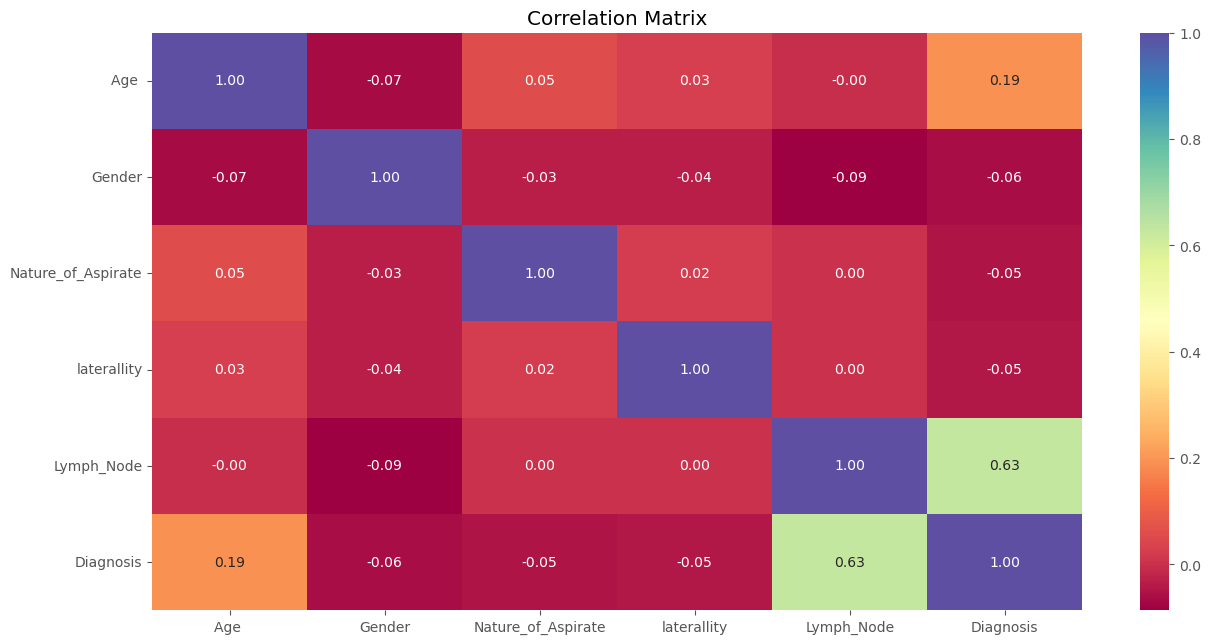

In [188]:
numerical_features = df1.select_dtypes(include='number').columns
plt.figure(figsize=(15, 7.5))
correlation_matrix = df1[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

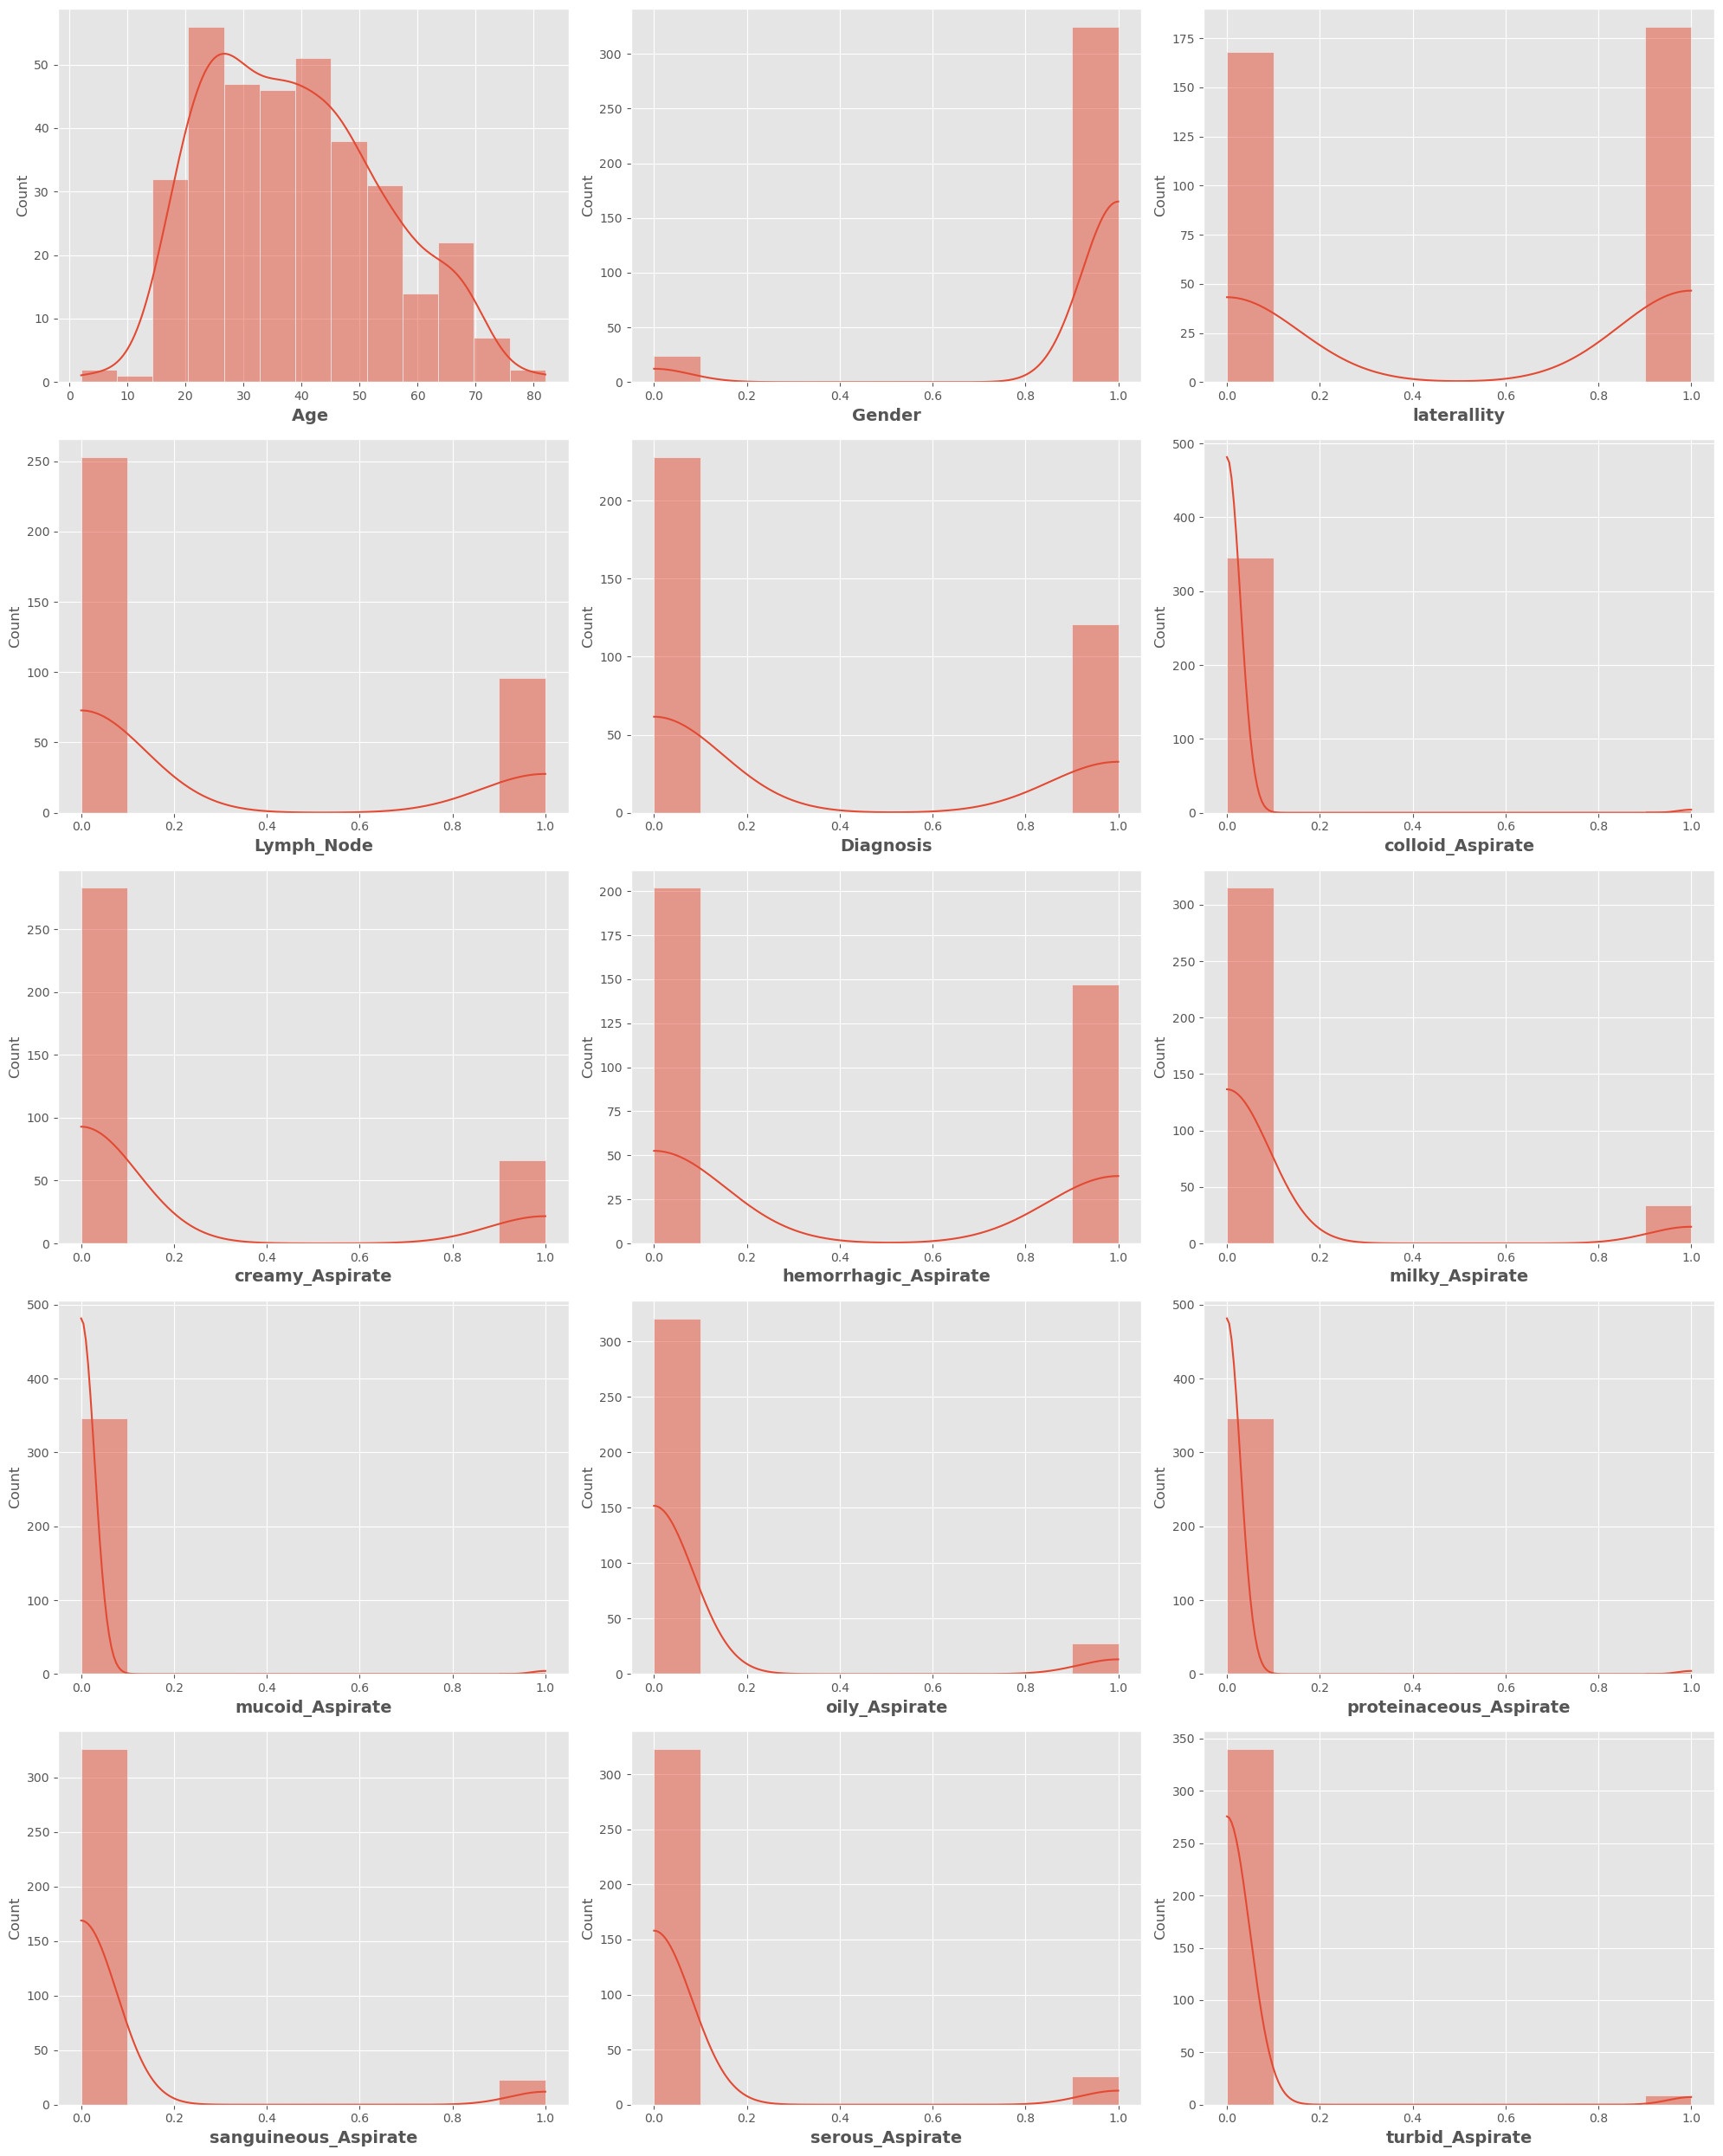

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(df[column], kde=True)  # Updated to use histplot instead of distplot (since distplot is deprecated)
        plt.xlabel(column, fontsize=14, fontweight='bold')  # Make x-label bold and larger
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# DATA PREPARATION

In [174]:
# Ensure all data label in the "Nature_of_Aspirate" column are in the same casing to avoid duplication
data['Nature_of_Aspirate'] = data['Nature_of_Aspirate'].str.lower()

In [175]:
# Assign dataframe to a new variable name
df = data

In [189]:
# Encode Bivariable Columns (Label Encoding)
df = pd.DataFrame(data)

# Define the mapping for the columns
gender_mapping = {'F': 1,'M': 0}
laterallity_mapping = {'L':1, 'R':0}
Lymph_Node_mapping = {'Yes':1, 'No':0}

# Apply the mapping
df['Gender'] = df['Gender'].map(gender_mapping)
df['laterallity'] = df['laterallity'].map(laterallity_mapping)
df['Lymph_Node'] = df['Lymph_Node'].map(Lymph_Node_mapping)

In [190]:
# Perform one-hot encoding for the "Nature_of_Aspirate" column with a custom suffix
one_hot_encoded = pd.get_dummies(df['Nature_of_Aspirate'], prefix='', drop_first=True)

# Rename the columns to add a suffix
one_hot_encoded.columns = [f'{col}_Aspirate' for col in one_hot_encoded.columns]


one_hot_encoded.columns = [col[1:] for col in one_hot_encoded.columns]

# Combine the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop("Nature_of_Aspirate", axis = 1)

In [191]:
# Drop unique identifier column
df = df.drop("ID", axis = 1)

In [211]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [192]:
# convert all Boolean to Integer
df = df.astype(int)

In [193]:
df.head()

,Age,Gender,laterallity,Lymph_Node,Diagnosis,colloid_Aspirate,creamy_Aspirate,hemorrhagic_Aspirate,milky_Aspirate,mucoid_Aspirate,oily_Aspirate,proteinaceous_Aspirate,sanguineous_Aspirate,serous_Aspirate,turbid_Aspirate
0,30,1,1,0,1,0,0,1,0,0,0,0,0,0,0
1,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,64,1,1,1,1,0,0,0,0,0,0,0,1,0,0


### Save the cleaned dataset into a new CSV file 

In [212]:
df.to_csv("Breast cancer dataset cleaned.csv", index = False)

In [1]:
# Import the new dataset
import pandas as pd
df= pd.read_csv("Breast cancer dataset cleaned.csv")

In [2]:
df.shape

(299, 15)

In [216]:
df.head()

,Age,Gender,laterallity,Lymph_Node,Diagnosis,colloid_Aspirate,creamy_Aspirate,hemorrhagic_Aspirate,milky_Aspirate,mucoid_Aspirate,oily_Aspirate,proteinaceous_Aspirate,sanguineous_Aspirate,serous_Aspirate,turbid_Aspirate
0,30,1,1,0,1,0,0,1,0,0,0,0,0,0,0
1,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,64,1,1,1,1,0,0,0,0,0,0,0,1,0,0


## MODEL DEVELOPMENT 

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Function to preprocess the data
def preprocess_data(df, target_column, test_size=0.1):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to train a given model
def train_model(model, X_train_scaled, y_train):
    model.fit(X_train_scaled, y_train)
    return model

# Function to evaluate model performance
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Function to find the best model based on F1-score and store results in a DataFrame
def find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test):
    results = []  # List to hold model names and their corresponding F1 scores
    best_model = None
    best_f1 = float("-inf")
    
    for name, model in models.items():
        print(f"Training {name}...")
        trained_model = train_model(model, X_train_scaled, y_train)
        _, _, _, f1 = evaluate_model(trained_model, X_test_scaled, y_test)
        
        # Append model name and F1 score to results
        results.append({"Model": name, "F1 Score": f1})
        
        if f1 > best_f1:
            best_f1 = f1
            best_model = (name, trained_model)
    
    print(f"\nBest Model: {best_model[0]} with F1-score: {best_f1:.4f}")
    
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return best_model, results_df

# Initialize classification models with adjusted hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=200),
    "Ridge Classifier": RidgeClassifier(alpha=0.5),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Random Forest Classifier": RandomForestClassifier(max_depth=10, n_estimators=100),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=15, min_samples_split=5),
    "XGBoost": xgb.XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=100),
    "Support Vector Machine": SVC(C=1.0, gamma=0.05)
}

X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df, target_column="Diagnosis")
best_model_name, results_df = find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test)

Training Logistic Regression...
Training Ridge Classifier...
Training Gradient Boosting Classifier...
Training K-Nearest Neighbors...
Training Random Forest Classifier...
Training Decision Tree Classifier...
Training XGBoost...
Training Support Vector Machine...

Best Model: Logistic Regression with F1-score: 0.8709


In [147]:
# Display the results DataFrame
results_df.sort_values(by="F1 Score", ascending=False).reset_index()

,index,Model,F1 Score
0,0,Logistic Regression,0.870899
1,1,Ridge Classifier,0.870899
2,2,Gradient Boosting Classifier,0.870899
3,6,XGBoost,0.870899
4,7,Support Vector Machine,0.870899
5,3,K-Nearest Neighbors,0.810000
6,4,Random Forest Classifier,0.746667
7,5,Decision Tree Classifier,0.733333


### GridSearch for Optimal Logistic Regression Hyperparameters

In [148]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Define the model
log_reg = LogisticRegression(solver='liblinear')  # Use 'liblinear' for small datasets

# Define the grid of hyperparameters to search
param_grid = {
    'C': np.logspace(-4, 4, 30),  # More values for C
    'penalty': ['l1', 'l2', 'elasticnet'],  # Include 'elasticnet' if using a suitable solver
    'max_iter': [100, 200, 300, 400],  # More options for max_iter
    'tol': [1e-4, 1e-3, 1e-2]  # Convergence tolerance
}

# Set up the GridSearchCV to optimize for F1 score
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Print F1 score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Hyperparameters: {'C': 32.90344562312671, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.70      0.88      0.78         8

    accuracy                           0.87        30
   macro avg       0.82      0.87      0.84        30
weighted avg       0.88      0.87      0.87        30

F1 Score: 0.8708994708994708


### Model Cross Validation

In [153]:
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Define the model with the best hyperparameters
log_reg = LogisticRegression(
    C=32.10344562312671,
    max_iter=300,
    penalty='l2',
    solver='liblinear',
    tol=0.01
)

# Define the Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5)

# Perform cross-validation with Stratified K-Folds
cv_scores = cross_val_score(log_reg, X, y, cv=skf, scoring='f1')

# Print the results
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("Standard Deviation of F1 Scores:", np.std(cv_scores))

Cross-Validation F1 Scores: [0.75       0.68421053 0.76190476 0.63157895 0.76190476]
Mean F1 Score: 0.7179197994987468
Standard Deviation of F1 Scores: 0.05194141111874368


# ANN

In [218]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import f1_score

X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a custom F1 score metric
def f1_score_metric(y_test, y_pred):
    # Convert y_test to float32 to match the type of y_pred
    y_test = tf.cast(y_test, tf.float32)  # Convert to float32

    # Convert probabilities to binary predictions
    y_pred_binary = tf.round(y_pred)  # Round the predictions to get binary values

    # Calculate precision and recall
    precision = tf.reduce_sum(y_test * y_pred_binary) / (tf.reduce_sum(y_pred_binary) + tf.keras.backend.epsilon())
    recall = tf.reduce_sum(y_test * y_pred_binary) / (tf.reduce_sum(y_test) + tf.keras.backend.epsilon())
    
    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Create a Sequential model
model = Sequential()

# Use Input layer to define input shape
model.add(Input(shape=(len(X.columns),)))  # Define input shape explicitly

# Add Dense layers with adjustments
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())  # For stable learning
model.add(Dropout(0.2))  # Lower dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model with adjusted learning rate and custom F1 score metric
model.compile(optimizer=Adam(learning_rate=0.0015), 
              loss='binary_crossentropy', 
              metrics=['accuracy', f1_score_metric])  # Include F1 score as a metric

# Summary of the model
model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 32 (128.00 B)

### Model Training 

In [219]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.15, 
                    verbose=1, 
                    callbacks=[early_stopping])  # Add the callback here


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5902 - f1_score_metric: 0.2467 - loss: 0.8089 - val_accuracy: 0.5897 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.7734
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5735 - f1_score_metric: 0.1717 - loss: 0.7889 - val_accuracy: 0.5897 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.7541
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6106 - f1_score_metric: 0.2924 - loss: 0.7142 - val_accuracy: 0.6154 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.7371
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6742 - f1_score_metric: 0.3496 - loss: 0.6818 - val_accuracy: 0.6154 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.7212
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6299 - f1_score_metric: 0.2014 - loss: 0.7828 - val_accuracy: 0.6154 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.7052
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6570 - f1_score

### Model Evaluation

In [220]:
# Evaluate the model on the training data (not recommended for final assessment)
train_loss, train_accuracy, train_f1_score = model.evaluate(X_train_scaled, y_train, verbose=1)

# Print the evaluation results
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train F1 Score: {train_f1_score:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - f1_score_metric: 0.7449 - loss: 0.4040
Train Loss: 0.4173
Train Accuracy: 0.8346
Train F1 Score: 0.7393


In [221]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_f1_score = model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8991 - f1_score_metric: 0.8667 - loss: 0.3368
Test Loss: 0.3287
Test Accuracy: 0.9111
Test F1 Score: 0.9000


# RESULTS

<div style="display: flex; justify-content: space-between;">

<div style="margin-right: 40px; width: 65%;">  <!-- Set width to 45% for the first table -->

| **Deep Learning Model Results** | 
|----------------------------------| 
| **Loss**                    | 
| 0.3387                           | 
| **Accuracy**                | 
| 0.9111 (or 91.11%)               | 
| **F1 Score**               | 
| 0.9000 (or 90.10%)               | 

</div>

<div style="width: 65%;">  <!-- Set width to 45% for the second table -->

| **Logistic Regression Results**        | 
|----------------------------------------| 
| **Best Model**: Logistic Regression    | 
| **F1 Score**                          | 
| 0.7179 (or 71.79%)                    | 
| **Accuracy**                          | 
| 0.8223 (or 82.23%)                    | 

</div>

</div>


### KEY INSIGHTS

- **Accuracy:**

>The Deep Learning Model has a higher accuracy (91.11%) compared to the Logistic Regression model (82.23%). This indicates that the Deep Learning Model made correct predictions more often than the Logistic Regression.
- **F1 Score:**

>The Deep Learning Model also has a significantly higher F1 score (90.10%) compared to the Logistic Regression (71.79%). The F1 score is especially important in binary classification problems where class distribution is imbalanced, as it provides a better measure of the model's accuracy on the minority class.

### EVALUATION METRICS

F1 Score, AUC-ROC, and Precision-Recall metrics should be used for evaluation due to the imbalanced nature of the dataset:

- >**F1 Score:** Balances precision and recall, highlighting the model’s effectiveness in identifying the minority class.
  
- >**AUC-ROC:** Assesses the model’s ability to distinguish between classes across different thresholds.
  
- >**Precision-Recall:** Focuses specifically on the performance of the positive class, minimizing false positives.
  
These metrics provide a comprehensive evaluation of the model's performance in handling class imbalance.

### VISUALISATIONS 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


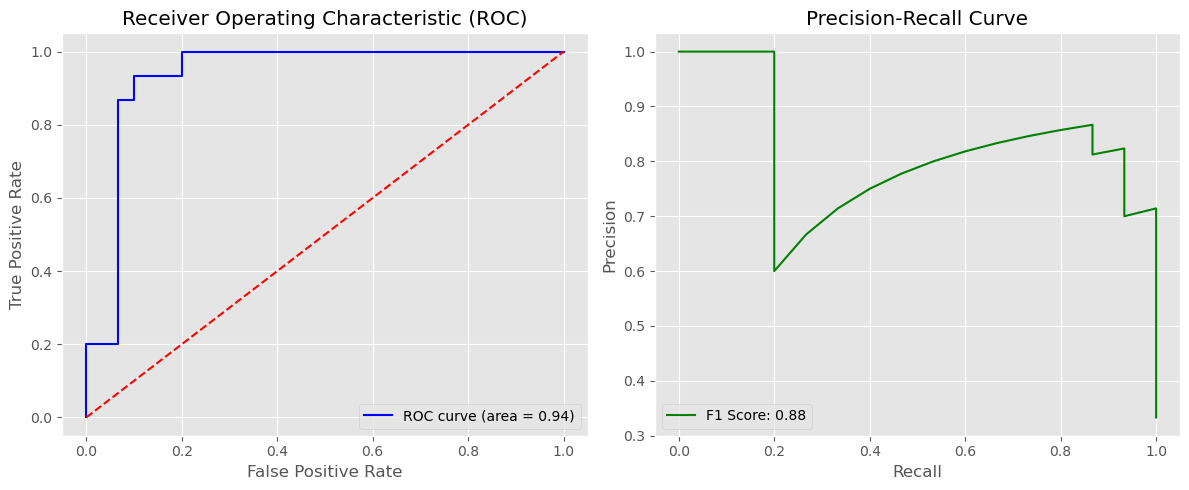

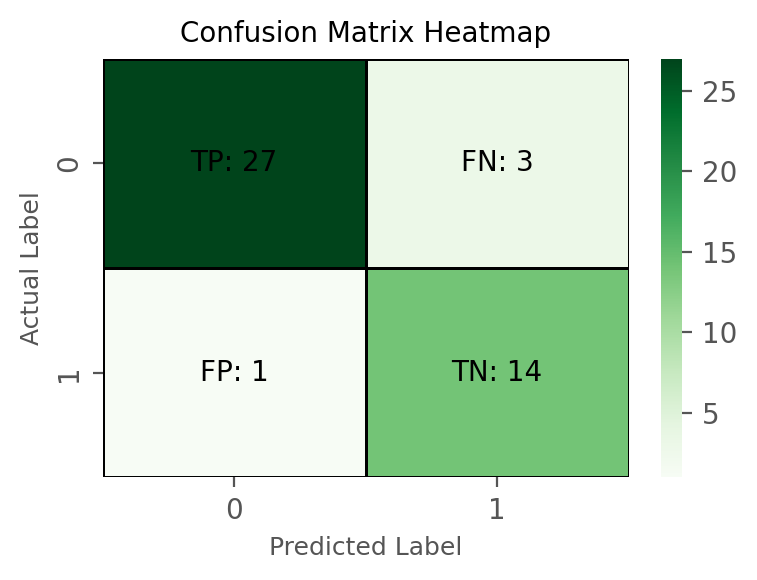

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, confusion_matrix
import seaborn as sns

# Get predicted probabilities from the neural network model
y_scores = model.predict(X_test_scaled).ravel()  # Probability of the positive class
y_true = y_test  # Your true labels for the test set

# Plot AUC-ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot for ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
f1 = f1_score(y_true, (y_scores > 0.5).astype(int))  # Convert probabilities to binary predictions

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)  # Create a subplot for Precision-Recall
plt.plot(recall, precision, color='green', label='F1 Score: {:.2f}'.format(f1))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

# Show the plots
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = (y_scores > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap with higher DPI for better resolution
plt.figure(figsize=(4, 3), dpi=200)  # Increase DPI for sharper image
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Greens', cbar=True, 
            linewidths=0.5, linecolor='black')  # Add lines between cells for clarity

# Set the labels and title with larger font sizes
plt.ylabel('Actual Label', fontsize=9)
plt.xlabel('Predicted Label', fontsize=9)
plt.title('Confusion Matrix Heatmap', fontsize=10)

# Get the values for each cell in the confusion matrix
TP, FN, FP, TN = conf_matrix.ravel()

# Adding labels manually to the quadrants with larger font sizes
plt.text(0.5, 0.5, f'TP: {TP}', ha='center', va='center', color='black', fontsize=10)
plt.text(0.5, 1.5, f'FP: {FP}', ha='center', va='center', color='black', fontsize=10)
plt.text(1.5, 0.5, f'FN: {FN}', ha='center', va='center', color='black', fontsize=10)
plt.text(1.5, 1.5, f'TN: {TN}', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# CONCLUSION

- **Logistic Regression:** Given the higher F1 score and accuracy, it appears to be the better choice for this particular dataset. This is due to various reasons, including the nature of the dataset, features, or possibly etc.

- **Deep Learning Model:** While it has acceptable performance, it may require further tuning. You could explore:

  > **Adjusting Hyperparameters:** Experiment with different architectures, learning rates, or batch sizes.
  
  > **Regularization Techniques:** Implementing L1/L2 regularization or dropout to mitigate overfitting.
  
  > **More Data:** If available, adding more data or augmenting the existing data could improve performance.

# LIVE DEMO (STREAMLIT)

In [224]:
with open("Breast_cancer_detection.py", "w") as file:
    file.write('''
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

# Load the dataset
df = pd.read_csv("Downloads/Breast cancer dataset cleaned.csv")

# Assuming 'Diagnosis' column contains the labels for whether a person has breast cancer or not
X = df.drop(columns=['Diagnosis'])  # Features
Y = df['Diagnosis']  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Optional: add batch normalization for stable learning
model.add(Dropout(0.2))  # Lower dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0015), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.15, 
          verbose=1, 
          callbacks=[early_stopping])

# Evaluate the model on the test set and calculate F1 score manually
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Streamlit App
logo_path = r"Downloads/logo.png" 
st.image(logo_path, use_column_width='auto')

# Streamlit app title
st.title("BreastGuard: Machine Learning-Based Breast Cancer Prediction System")

# App description
st.write("""
Please Input Corresponding Patient Data
""")

# Sidebar for user inputs
st.header('Patient Input Parameters')

def user_input_features():
    Age = st.number_input('Enter Patient Age', min_value=1, max_value=120, step=1)  # Integer input for age
    gender_options = {
        "Male": 0,
        "Female": 1
    }
    Gender = st.selectbox('Gender', list(gender_options.keys()))  # Display gender options

    # Get the selected gender value
    Gender = gender_options[Gender]  # Map to numeric value

    # Create a dictionary to map labels to values for laterality
    laterality_options = {
        "Left": 1,
        "Right": 0
    }
    laterality = st.selectbox('Laterality', list(laterality_options.keys()))  # Display laterality options

    # Get the selected laterality value
    laterality = laterality_options[laterality]  # Map to numeric value

    # Create a dictionary to map labels to values for lymph node
    lymph_node_options = {
        "No": 0,
        "Yes": 1
    }
    Lymph_Node = st.selectbox('Lymph Node', list(lymph_node_options.keys()))  # Display lymph node options

    # Get the selected lymph node value
    Lymph_Node = lymph_node_options[Lymph_Node]

    
    
    Nature_of_Aspirate = st.selectbox('Nature of Aspirate', 
                                       ["colloid_Aspirate", "creamy_Aspirate", "hemorrhagic_Aspirate", 
                                        "milky_Aspirate", "mucoid_Aspirate", "oily_Aspirate", 
                                        "proteinaceous_Aspirate", "sanguineous_Aspirate", 
                                        "serous_Aspirate", "turbid_Aspirate"])
    
    data = {
        'Age': Age,
        'Gender': Gender,
        'laterality': laterality,
        'Lymph_Node': Lymph_Node,
        'Nature_of_Aspirate': Nature_of_Aspirate
    }

    # Convert the input data into a DataFrame
    features = pd.DataFrame(data, index=[0])
    
    # Align the features with the training data (adding missing columns if necessary)
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    return features

input_df = user_input_features()

if st.button('Submit'):
    # Scale the user input
    input_scaled = scaler.transform(input_df)

    # Make predictions based on user input
    prediction = model.predict(input_scaled)
    prob_malignant = prediction[0][0]  # Probability of malignant (1)
    prob_benign = 1 - prob_malignant   # Probability of benign (0)

    # Display the prediction results
    st.subheader('Prediction')
    
    if prob_malignant < 0.70 and prob_malignant > 0.5:
        st.write("Most likely malignant, further testing advised.")
    elif prob_malignant > 0.70:
        st.write(f"Predicted Diagnosis: {'Malignant' if prob_malignant >= 0.5 else 'Benign'}")

    if prob_benign < 0.70 and prob_benign > 0.5:
        st.write("Most likely benign, further testing advised.")
    elif prob_benign > 0.70:
        st.write(f"Predicted Diagnosis: {'Benign' if prob_malignant < 0.5 else 'Malignant'}")

    st.subheader('Prediction Probability')
    st.write(f"Probability of Malignant: {prob_malignant:.2f}")
    st.write(f"Probability of Benign: {prob_benign:.2f}")
    ''')

---
_**Copied and edited from**_,  
**`SULTAN AKINOLA ATANDA`**